# Reading log files from the RaspberryPi Pico2

In [12]:
import struct
import numpy as np
import matplotlib.pyplot as plt

### import file from SD card under LittleFS

After 18 blocks the data sum up to 512 bytes, so a new memory block needs to be written to disc.<br>
This delays program execution by about 10ms, indicating a write speed of 400kbit/s only ?!<br>
After the first 3 samples there is an unknown delay of about 1s.<br>

The readout loop itself takes 800µs per dataset.<br>
New accelerometer data are available every 3-4 cycles - about 3ms.<br>
This is consistent with SampleRateDiv=2 : 375 Hz readout.<br>
The gyro does not run synchronuous with that but at the same speed.<br>

In [30]:
8*512/0.01

409600.0

In [29]:
BLOCK_SIZE = struct.calcsize('iffffff')
print(BLOCK_SIZE)
print(BLOCK_SIZE*18)
block_type = np.dtype([("timestamp", np.int32), ("acc_x", np.float32), ("acc_y", np.float32), ("acc_z", np.float32),
                  ("gyro_x", np.float32), ("gyro_y", np.float32), ("gyro_z", np.float32)])

28
504


In [10]:
data = np.fromfile("imu_log.dat", dtype=block_type)

In [11]:
data

array([(334215226, 0.05407715, -0.10107422, 0.9382324, 0.5187988 , -1.2664795, -0.6713867 ),
       (334216216, 0.05407715, -0.10107422, 0.9382324, 0.39672852, -1.0070801, -0.7324219 ),
       (334217056, 0.05444336, -0.1027832 , 0.9415283, 0.39672852, -1.0070801, -0.7324219 ),
       ...,
       (344212813, 0.05578613, -0.09716797, 0.9411621, 0.6866455 , -1.2207031, -0.4272461 ),
       (344213614, 0.05578613, -0.09716797, 0.9411621, 0.8544922 , -1.0986328, -0.47302246),
       (344214414, 0.05578613, -0.09716797, 0.9411621, 0.8544922 , -1.0986328, -0.47302246)],
      dtype=[('timestamp', '<i4'), ('acc_x', '<f4'), ('acc_y', '<f4'), ('acc_z', '<f4'), ('gyro_x', '<f4'), ('gyro_y', '<f4'), ('gyro_z', '<f4')])

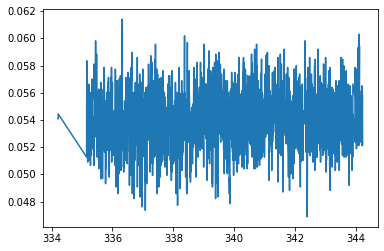

In [15]:
timestamp = data['timestamp']
acc_x = data['acc_x']

plt.plot(1e-6*timestamp,acc_x)
plt.show()

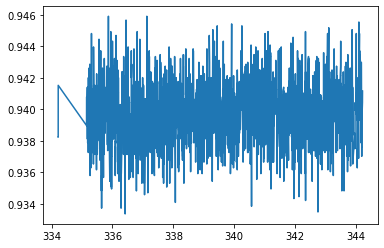

In [16]:
timestamp = data['timestamp']
acc_z = data['acc_z']

plt.plot(1e-6*timestamp,acc_z)
plt.show()

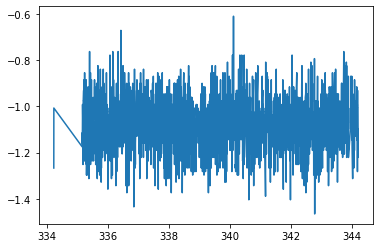

In [17]:
timestamp = data['timestamp']
gyro_y = data['gyro_y']

plt.plot(1e-6*timestamp,gyro_y)
plt.show()

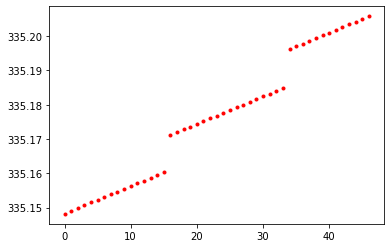

In [27]:
plt.plot(1e-6*timestamp[3:50],'r.')
plt.show()

In [25]:
timestamp[3:50]

array([335148140, 335149064, 335149892, 335150697, 335151495, 335152293,
       335153089, 335153881, 335154678, 335155483, 335156277, 335157072,
       335157883, 335158681, 335159476, 335160282, 335171135, 335172000,
       335172815, 335173612, 335174407, 335175204, 335176004, 335176802,
       335177602, 335178400, 335179199, 335179994, 335180798, 335181598,
       335182408, 335183208, 335184009, 335184811, 335196117, 335196980,
       335197796, 335198604, 335199403, 335200201, 335200999, 335201806,
       335202598, 335203398, 335204196, 335204997, 335205801], dtype=int32)

In [32]:
timestamp[13]-timestamp[3]

8137

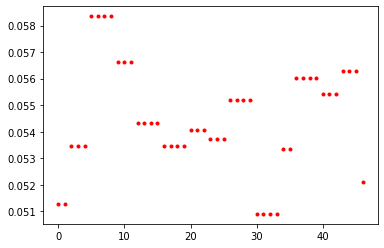

In [31]:
plt.plot(acc_x[3:50],'r.')
plt.show()

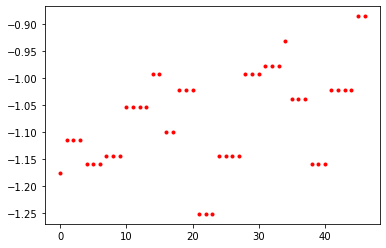

In [33]:
plt.plot(gyro_y[3:50],'r.')
plt.show()